In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#member" data-toc-modified-id="member-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>member</a></span><ul class="toc-item"><li><span><a href="#city" data-toc-modified-id="city-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>city</a></span></li><li><span><a href="#bd" data-toc-modified-id="bd-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>bd</a></span></li><li><span><a href="#gender" data-toc-modified-id="gender-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>gender</a></span></li><li><span><a href="#registered_via" data-toc-modified-id="registered_via-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>registered_via</a></span></li><li><span><a href="#registration_init_time" data-toc-modified-id="registration_init_time-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>registration_init_time</a></span></li><li><span><a href="#expiration_date" data-toc-modified-id="expiration_date-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>expiration_date</a></span></li></ul></li></ul></div>

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
comb_df = train_df.append(test_df)
members_df = pd.read_csv('data/members.csv')
songs_df = pd.read_csv('data/songs.csv')
song_extra_info_df = pd.read_csv('data/song_extra_info.csv')

songs_df = songs_df.merge(song_extra_info_df, on='song_id', how='left')

train_df = train_df.merge(songs_df, on='song_id', how='left')
test_df = test_df.merge(songs_df, on='song_id', how='left')

train_df = train_df.merge(members_df, on='msno', how='left')
test_df = test_df.merge(members_df, on='msno', how='left')

# fill missing data to visualize
train_df.fillna('nan', inplace=True)
test_df.fillna('nan', inplace=True)

# member

## city

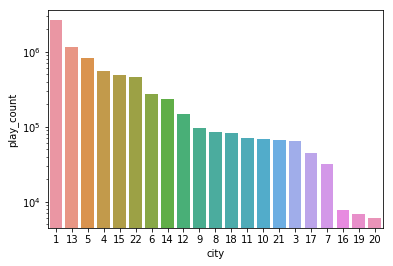

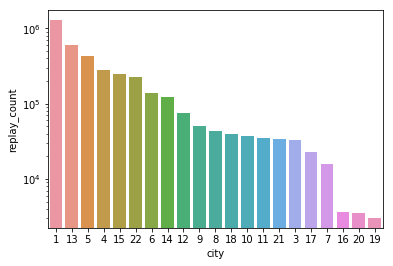

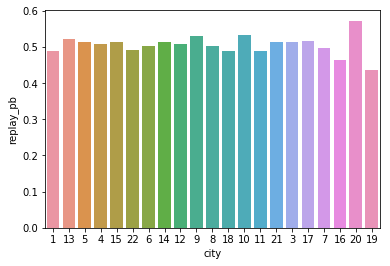

-0.0390307723739
-0.0468755538298
0.999618409452


,city,replay_pb,play_count,replay_count
0,1,0.489684,2621293,1283606
11,13,0.521679,1144863,597251
3,5,0.513664,830128,426407
2,4,0.507215,545820,276848
13,15,0.512750,484078,248211
20,22,0.491634,460330,226314
4,6,0.501275,275781,138242
12,14,0.514366,236639,121719
10,12,0.507405,147133,74656
7,9,0.529983,95237,50474


In [3]:
city_df = train_df[['city', 'target']].groupby('city').agg(['mean', 'count']).reset_index()
city_df.columns = ['city', 'replay_pb', 'play_count']
city_df['replay_count'] = (city_df['replay_pb'] * city_df['play_count']).astype(np.int32)

g = sns.barplot(x='city', y='play_count', data=city_df, order=city_df.sort_values(by=['play_count'], ascending=False)['city'])
g.set_yscale('log', nonposy='clip')
plt.show()

g = sns.barplot(x='city', y='replay_count', data=city_df, order=city_df.sort_values(by=['replay_count'], ascending=False)['city'])
g.set_yscale('log', nonposy='clip')
plt.show()

sns.barplot(x='city', y='replay_pb', data=city_df, order=city_df.sort_values(by=['replay_count'], ascending=False)['city'])
plt.show()

print(city_df['replay_count'].corr(city_df['replay_pb']))
print(city_df['play_count'].corr(city_df['replay_pb']))
print(city_df['play_count'].corr(city_df['replay_count']))

# sns.jointplot(x="play_count", y="replay_pb", data=city_df, kind="reg")

city_df.sort_values(by=['play_count'], ascending=False)

City 1 is the main city. 

## bd

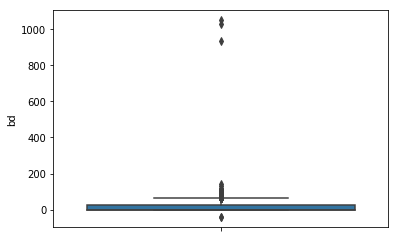

In [4]:
bd_members_df = members_df[['msno', 'bd']]

sns.boxplot(y=bd_members_df['bd'])
plt.show()

Obviously, it has unbelievable bd values.

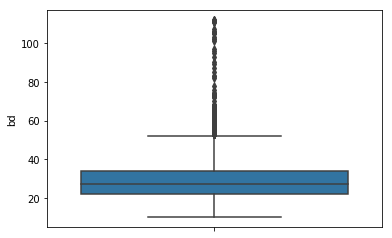

In [5]:
bd_members_df = members_df[['msno', 'bd']]
# remove invalid values
bd_members_df = bd_members_df[(bd_members_df['bd'] > 7) & (bd_members_df['bd'] < 120)]
sns.boxplot(y=bd_members_df['bd'])
plt.show()

bd_mean = bd_members_df['bd'].mean()
bd_std = bd_members_df['bd'].std()

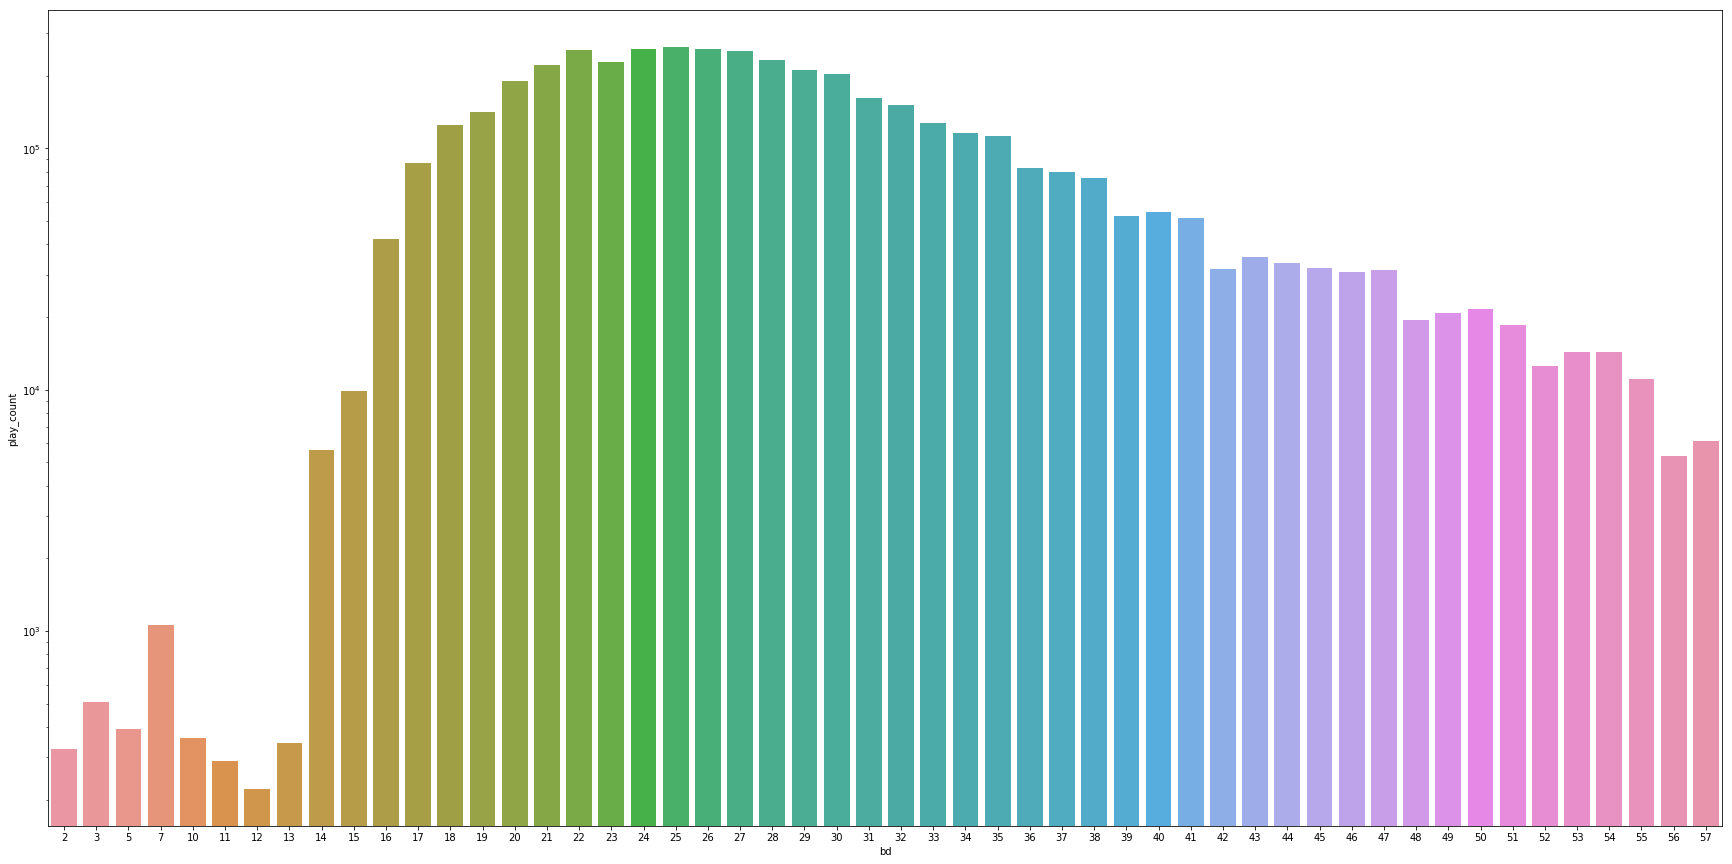

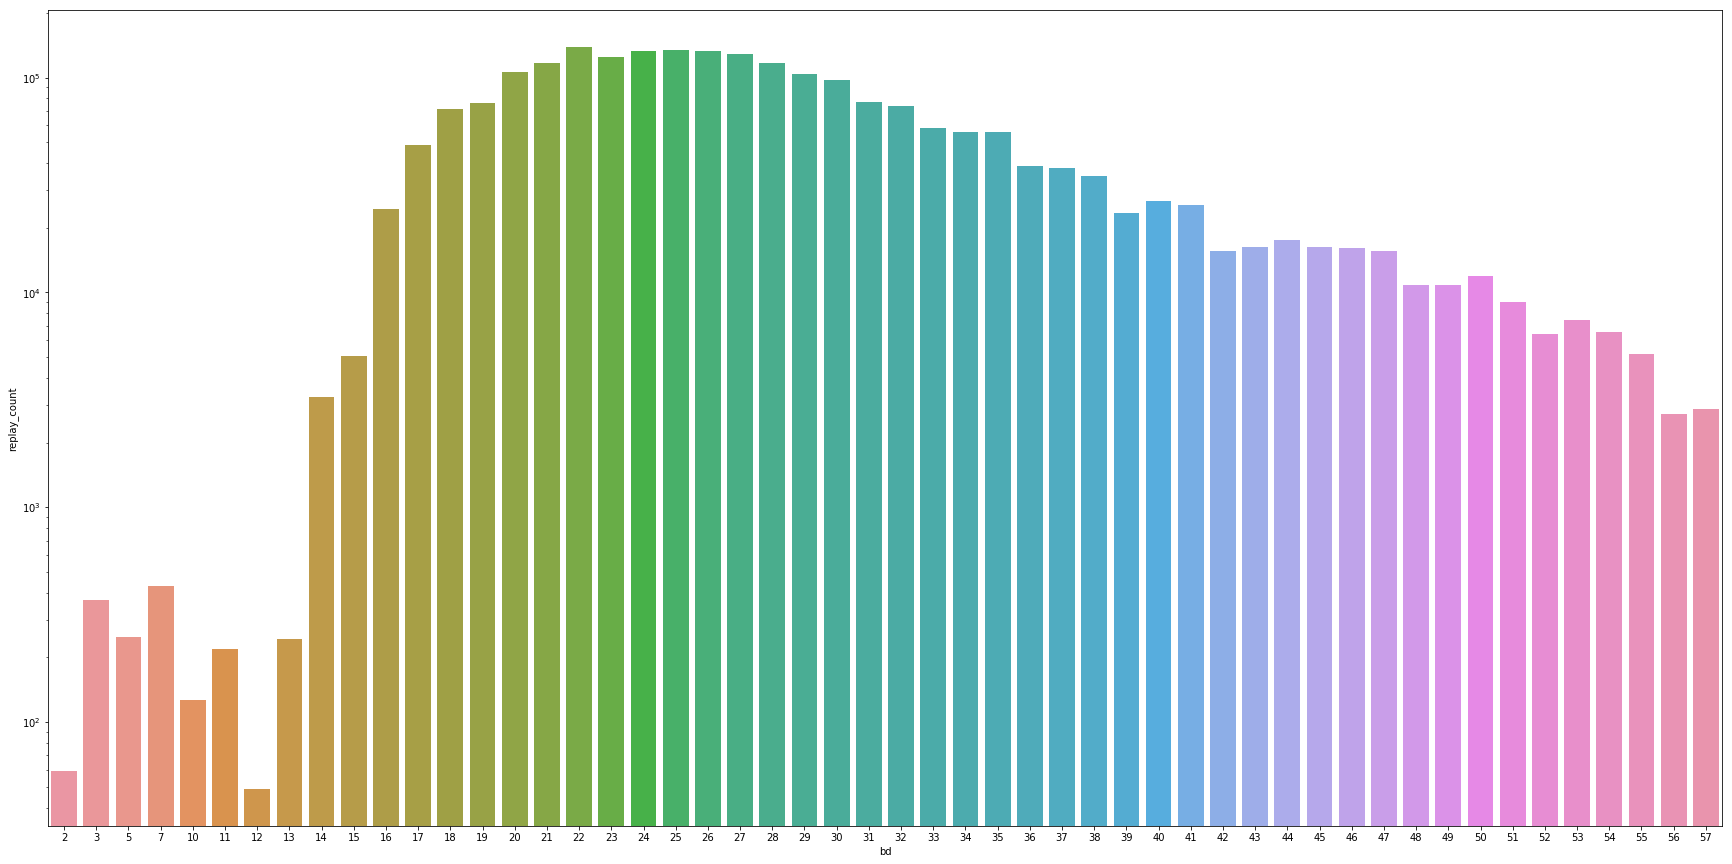

In [6]:
bd_df = train_df[['bd', 'target']].groupby('bd').agg(['mean', 'count']).reset_index()
bd_df.columns = ['bd', 'replay_pb', 'play_count']
bd_df['replay_count'] = (bd_df['replay_pb'] * bd_df['play_count']).astype(np.int32)

# remove outliers
bd_df = bd_df[np.abs(bd_df['bd'] - bd_mean) <= 3 * bd_std]
plt.figure(figsize=(30, 15)) 
g = sns.barplot(x='bd', y='play_count', data=bd_df)
g.set_yscale('log', nonposy='clip')
plt.show()

plt.figure(figsize=(30, 15)) 
g = sns.barplot(x='bd', y='replay_count', data=bd_df)
g.set_yscale('log', nonposy='clip')
plt.show()

The age between 22 and 27 is the main users.

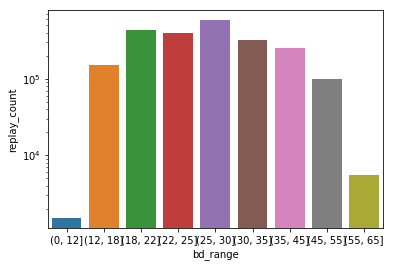

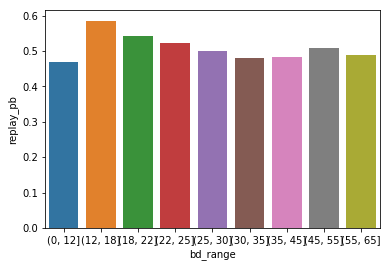

In [7]:
bd_length_bins = [0, 12, 18, 22, 25, 30, 35, 45, 55, 65]
bd_df['cut_bd_length'] = pd.cut(bd_df['bd'], bins=bd_length_bins)
tmp_bd_df = bd_df.groupby('cut_bd_length').agg(['mean', 'sum']).reset_index()
tmp_bd_df.columns = ['bd_range', '_', '_', 'replay_pb', '_', '_', 'play_count', '_', 'replay_count']
tmp_bd_df.drop(['_'], axis=1, inplace=True)
tmp_bd_df

g = sns.barplot(x='bd_range', y='replay_count', data=tmp_bd_df)
g.set_yscale('log', nonposy='clip')
plt.show()

sns.barplot(x='bd_range', y='replay_pb', data=tmp_bd_df)
plt.show()

The users whose age is between 12 and 18 have the most chance to replay even through they didn't play songs as many as others.

## gender

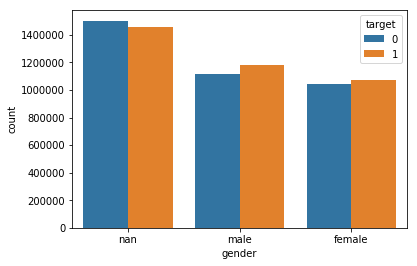

In [10]:
sns.countplot(x='gender', hue='target', data=train_df, order=train_df['gender'].value_counts().index)
plt.show()

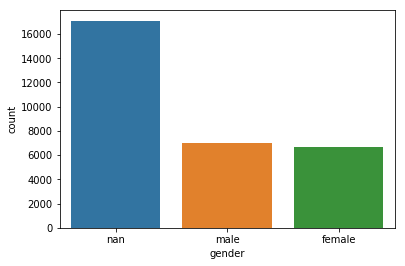

In [16]:
count_df = train_df[['msno', 'gender', 'target']].drop_duplicates('msno')
sns.countplot(x='gender', data=count_df, order=count_df['gender'].value_counts().index)
plt.show()

It obvious that **female** users almost equal to **male** users. In this opinion, we may fill missing data randomly with *female* or *male*. 

## registered_via

## registration_init_time

## expiration_date